<a href="https://colab.research.google.com/github/lucastadeump/IGTI-01_covid-19/blob/master/Trabalho_Pr%C3%A1tico_1_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IGTI - Bootcamp Online - Analista de Dados

## <center>Teste Prático 1 - COVID 19

**OBS**: Para a solução dos exercícios propostos, foi sugerida a utilização do Power BI. Este notebook foi criado para verificação das respostar obtidas no software.

Atenção aos tipos de dados de cada coluna. Crie uma nova medida chamada “Active” para calcular o número de casos ativos, que é no caso é o valor da coluna “Confirmed” menos a soma das colunas “Recovered” e “Deaths”. Crie gráficos para facilitar a sua visualização, de acordo com a questão.

### Preparação do ambiente

In [0]:
#importando as bibliotecas e definindo configurações
import numpy as np

import pandas as pd
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#importando os dados
dados = pd.read_csv('https://raw.githubusercontent.com/lucastadeump/IGTI-01_covid-19/master/covid_19_data.csv')
dados.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00


In [0]:
#criando a coluna 'Active'
dados['Active'] = dados['Confirmed'] - (dados['Recovered'] + dados['Deaths'])

In [16]:
#observando a estrutura dos dados
dados.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.00,0.00,0.00,1.00
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.00,0.00,0.00,14.00
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.00,0.00,0.00,6.00
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.00,0.00,0.00,1.00
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.00,0.00,0.00,0.00


In [17]:
#medidas gerais dos dados
dados.describe()

,SNo,Confirmed,Deaths,Recovered,Active
count,"29,426.00","29,426.00","29,426.00","29,426.00","29,426.00"
mean,"14,713.50","6,237.24",408.01,"2,003.86","3,825.37"
std,"8,494.70","24,551.98","2,289.69","12,326.85","19,883.94"
min,1.00,0.00,0.00,0.00,"-379,157.00"
25%,"7,357.25",20.00,0.00,0.00,7.00
50%,"14,713.50",252.00,3.00,10.00,87.00
75%,"22,069.75","1,642.75",42.00,251.75,989.75
max,"29,426.00","362,764.00","36,914.00","379,157.00","333,535.00"


In [18]:
#informações gerais dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29426 entries, 0 to 29425
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              29426 non-null  int64  
 1   ObservationDate  29426 non-null  object 
 2   Province/State   14527 non-null  object 
 3   Country/Region   29426 non-null  object 
 4   Last Update      29426 non-null  object 
 5   Confirmed        29426 non-null  float64
 6   Deaths           29426 non-null  float64
 7   Recovered        29426 non-null  float64
 8   Active           29426 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.0+ MB


### Exercício 1
Como fica o grágico com as medidas “Confirmed”, “Deaths”, “Recovered” e “Active” apenas para a China (Mainland China)?

In [0]:
#função para filtrar dados por país
def seleciona_pais(pais):
    return dados[dados['Country/Region'] == pais].groupby('ObservationDate').sum().drop(columns='SNo')

In [20]:
#criando dataframe com informações da China
china = seleciona_pais('Mainland China')
china.head()

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
01/22/2020,547.00,17.00,28.00,502.00
01/23/2020,639.00,18.00,30.00,591.00
01/24/2020,916.00,26.00,36.00,854.00
01/25/2020,"1,399.00",42.00,39.00,"1,318.00"
01/26/2020,"2,062.00",56.00,49.00,"1,957.00"


In [21]:
china.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 01/22/2020 to 05/25/2020
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  125 non-null    float64
 1   Deaths     125 non-null    float64
 2   Recovered  125 non-null    float64
 3   Active     125 non-null    float64
dtypes: float64(4)
memory usage: 4.9+ KB


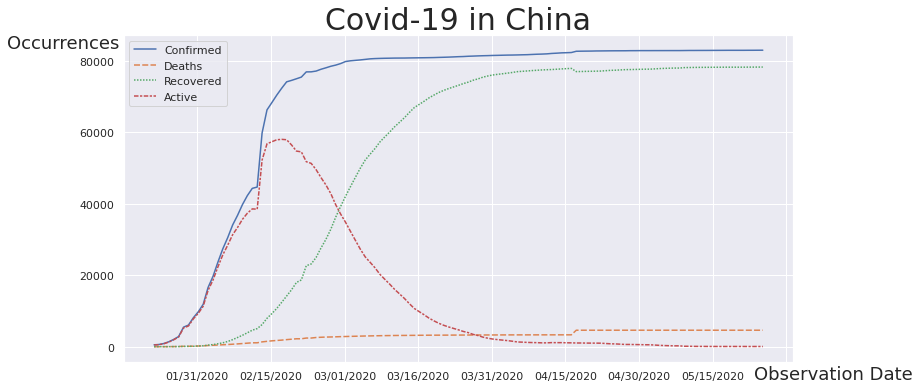

In [36]:
#Criando o gráfico com todos os dados da China

#dados e figura
ax = sns.lineplot(data=china)
ax.figure.set_size_inches(12, 6)
ax.set_title('Covid-19 in China', fontsize=30)

#Configurando eixos
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 15))
ax.xaxis.set_label_coords(1.06, -0.01)
ax.yaxis.set_label_coords(-0.09, 0.95)
ax.set_xlabel('Observation Date', fontsize=18)
ax.set_ylabel('Occurrences', rotation=(0), fontsize=18)

plt.show()

### Exercício 2
Filtre por país, selecionando a Coreia do Sul (South Korea). Em que mês esse país atingiu o pico de casos ativos?

In [0]:
#Criando função para retornar o mês referente a um dado valor de uma coluna em um determinado dataframe
def extrai_mes(df, valor, coluna):

    mes = pd.DatetimeIndex(df.loc[df[coluna] == valor].index).month.values[0]
    nomes_meses = {1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril',
             5:'Maio', 6:'Junho', 7:'Julho', 8:'Agosto',
             9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}
    
    for i in range(1, 13):
        if i == mes:
            mes = nomes_meses[i]
            break
        else:
            continue
            
    return mes

In [24]:
#DF da Coreia do Sul
s_korea = seleciona_pais('South Korea')
s_korea[50:60] #mostrando parte do DF

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
03/12/2020,"7,869.00",66.00,333.00,"7,470.00"
03/13/2020,"7,979.00",66.00,510.00,"7,403.00"
03/14/2020,"8,086.00",72.00,510.00,"7,504.00"
03/15/2020,"8,162.00",75.00,510.00,"7,577.00"
03/16/2020,"8,236.00",75.00,"1,137.00","7,024.00"
03/17/2020,"8,320.00",81.00,"1,407.00","6,832.00"
03/18/2020,"8,413.00",84.00,"1,540.00","6,789.00"
03/19/2020,"8,565.00",91.00,"1,540.00","6,934.00"
03/20/2020,"8,652.00",94.00,"1,540.00","7,018.00"


In [25]:
#Dados sobre o valor máximo de casos ativos na Coreia do Sul
s_korea.loc[s_korea['Active'] == max(s_korea['Active'])]

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
03/15/2020,"8,162.00",75.00,510.00,"7,577.00"


In [26]:
#Extração do mês referente ao valor máximo de casos ativos na Coreia do Sul
mes = extrai_mes(s_korea, max(s_korea['Active']), 'Active')
print(f"A Coreia do Sul atingiu o maior número de casos ativos em {mes}.")

A Coreia do Sul atingiu o maior número de casos ativos em Março.


### Exercício 3
Filtre por país, selecionando a Itália (Italy). Analise as informações do dataset e responda: em que mês a Itália passou a ter mais casos recuperados do que casos ativos?

In [27]:
#Dataframe da Itália
italia = seleciona_pais('Italy')
italia.head()

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
01/31/2020,2.00,0.00,0.00,2.00
02/01/2020,2.00,0.00,0.00,2.00
02/02/2020,2.00,0.00,0.00,2.00
02/03/2020,2.00,0.00,0.00,2.00
02/04/2020,2.00,0.00,0.00,2.00


In [28]:
#Ocasiões em que o número de casos recuperados foi maior do que o de casos ativos na Itália
italia.query('Recovered > Active')

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
05/06/2020,"214,457.00","29,684.00","93,245.00","91,528.00"
05/07/2020,"215,858.00","29,958.00","96,276.00","89,624.00"
05/08/2020,"217,185.00","30,201.00","99,023.00","87,961.00"
05/09/2020,"218,268.00","30,395.00","103,031.00","84,842.00"
05/10/2020,"219,070.00","30,560.00","105,186.00","83,324.00"
05/11/2020,"219,814.00","30,739.00","106,587.00","82,488.00"
05/12/2020,"221,216.00","30,911.00","109,039.00","81,266.00"
05/13/2020,"222,104.00","31,106.00","112,541.00","78,457.00"
05/14/2020,"223,096.00","31,368.00","115,288.00","76,440.00"


In [29]:
#Obtenção do mês em que o fenômeno ocorreu pela primeira vez
mes = extrai_mes(italia.query('Recovered > Active'), 
                 italia.query('Recovered > Active')['Recovered'].head(1).values[0], 
                 'Recovered')
print(f'A Itália passou a ter mais casos Recuperados do que Ativos no mês de {mes}')

A Itália passou a ter mais casos Recuperados do que Ativos no mês de Maio


### Exercício 4
Ao criar um gráfico com a medida “Active”, apenas para a Itália (Italy), como fica o gráfico?

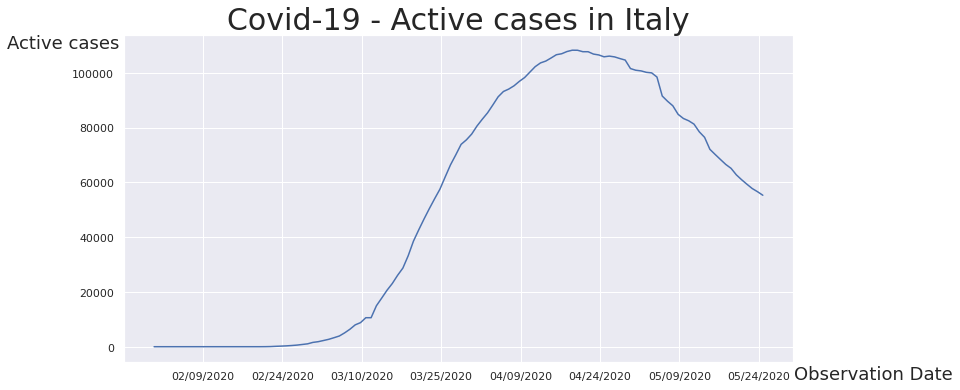

In [38]:
#Gráico apenas com os valores dos casos ativos da Itália no período observado

#dados e figura
ax = sns.lineplot(data=italia['Active'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Covid-19 - Active cases in Italy', fontsize=30)

#Configurando eixos
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 15))
ax.xaxis.set_label_coords(1.12, -0.01)
ax.yaxis.set_label_coords(-0.09, 0.95)
ax.set_xlabel('Observation Date', fontsize=18)
ax.set_ylabel('Active cases', rotation=(0), fontsize=18)

plt.show()

### Exercício 5
Filtre por país, selecionando a Venezuela, analise as informações, perceba que algumas vezes o número de casos recuperados foi maior que o de casos ativos. Em que mês isso ocorreu pela primeira vez?

In [0]:
#Dataframe da Venezuela
venezuela = seleciona_pais('Venezuela')

In [32]:
#Ocasiões em que o número de casos recuperados foi maior do que o de casos ativos na Venezuela
venezuela.query('Recovered > Active')

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
04/09/2020,171.00,9.00,84.00,78.00
04/10/2020,171.00,9.00,84.00,78.00
04/11/2020,175.00,9.00,93.00,73.00
04/12/2020,181.00,9.00,93.00,79.00
04/13/2020,189.00,9.00,110.00,70.00
04/14/2020,189.00,9.00,110.00,70.00
04/15/2020,197.00,9.00,111.00,77.00
04/16/2020,204.00,9.00,111.00,84.00
04/17/2020,204.00,9.00,111.00,84.00


In [33]:
#Obtenção do mês em que o fenômeno ocorreu pela primeira vez
mes = extrai_mes(venezuela.query('Recovered > Active'), 
                 venezuela.query('Recovered > Active')['Recovered'].head(1).values[0], 
                 'Recovered')
print(f'A Venezuela passou a ter mais casos Recuperados do que Ativos no mês de {mes}.')

A Venezuela passou a ter mais casos Recuperados do que Ativos no mês de Abril.
